In [12]:
#import libararies
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["lines.linewidth"] = 2
plt.style.use("ggplot")

### Đọc dữ liệu

In [13]:
df = pd.read_excel('G:\Finpros Interview_BuildModel\File_All_ex.xlsx')

In [14]:
df.head(10)

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Date
0,FPT,12/25/2018 9:15,3089,3089,3089,3089,35410,0,2018-12-25
1,FPT,12/25/2018 9:16,3081,3081,3081,3081,190,0,2018-12-25
2,FPT,12/25/2018 9:17,3074,3081,3074,3074,1120,0,2018-12-25
3,FPT,12/25/2018 9:18,3074,3074,3074,3074,2120,0,2018-12-25
4,FPT,12/25/2018 9:19,3074,3074,3074,3074,22500,0,2018-12-25
5,FPT,12/25/2018 9:20,3074,3074,307,3074,7140,0,2018-12-25
6,FPT,12/25/2018 9:21,3066,3074,3059,3066,16480,0,2018-12-25
7,FPT,12/26/2018 9:15,3104,3111,3104,3111,2650,0,2018-12-26
8,FPT,12/26/2018 9:16,3119,3119,3119,3119,500,0,2018-12-26
9,FPT,12/26/2018 9:17,3111,3119,3111,3119,510,0,2018-12-26


### Mô tả dữ liệu

In [53]:
df.shape

(459335, 9)

In [54]:
df.describe()

,Open,High,Low,Close,Volume,Open Interest
count,459335.000000,459335.000000,459335.000000,459335.000000,4.593350e+05,459335.0
mean,2793.508191,2679.717559,2868.368613,2796.736112,4.909390e+03,0.0
std,2845.696530,2787.426411,2879.088842,2847.608204,1.902104e+04,0.0
min,31.000000,31.000000,31.000000,31.000000,1.000000e+00,0.0
25%,644.000000,636.000000,672.000000,643.000000,3.600000e+02,0.0
50%,1016.000000,972.000000,1037.000000,1018.000000,1.500000e+03,0.0
75%,4942.000000,4866.000000,4995.000000,4942.000000,4.920000e+03,0.0
max,10016.000000,10016.000000,10016.000000,10016.000000,3.300680e+06,0.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459335 entries, 0 to 459334
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Ticker         459335 non-null  object        
 1   Date/Time      459335 non-null  object        
 2   Open           459335 non-null  int64         
 3   High           459335 non-null  int64         
 4   Low            459335 non-null  int64         
 5   Close          459335 non-null  int64         
 6   Volume         459335 non-null  int64         
 7   Open Interest  459335 non-null  int64         
 8   Date           459335 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 31.5+ MB


### Tiền xử lý dữ liệu

In [15]:
df["Date"] = pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
df.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Date
Date,,,,,,,,,
2018-12-25,FPT,12/25/2018 9:15,3089,3089,3089,3089,35410,0,2018-12-25
2018-12-25,FPT,12/25/2018 9:16,3081,3081,3081,3081,190,0,2018-12-25
2018-12-25,FPT,12/25/2018 9:17,3074,3081,3074,3074,1120,0,2018-12-25
2018-12-25,FPT,12/25/2018 9:18,3074,3074,3074,3074,2120,0,2018-12-25
2018-12-25,FPT,12/25/2018 9:19,3074,3074,3074,3074,22500,0,2018-12-25


In [16]:
FPT = df[df["Ticker"] == "FPT"]
MSN = df[df["Ticker"] == "MSN"]
PNJ = df[df["Ticker"] == "PNJ"]
VIC = df[df["Ticker"] == "VIC"]
VIC.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Date
Date,,,,,,,,,
2018-10-17,VIC,10/17/2018 9:39,985,985,985,985,390,0,2018-10-17
2018-10-17,VIC,10/17/2018 9:40,985,985,985,985,760,0,2018-10-17
2018-10-17,VIC,10/17/2018 9:41,986,986,986,986,2060,0,2018-10-17
2018-10-17,VIC,10/17/2018 9:42,986,986,986,986,5540,0,2018-10-17
2018-10-17,VIC,10/17/2018 9:43,986,987,986,987,760,0,2018-10-17


In [17]:
mean_Close_ticker = df.groupby("Ticker")["Close"].mean()
mean_Close_ticker

Ticker
FPT    3050.612334
MSN    1486.801565
PNJ    5542.490172
VIC     905.757085
Name: Close, dtype: float64

In [18]:
tech_list = ['FPT', 'MSN', 'PNJ','VIC']
Company = [FPT, MSN, PNJ, VIC]

### Vẽ biểu đồ hiển thị giá đóng cửa

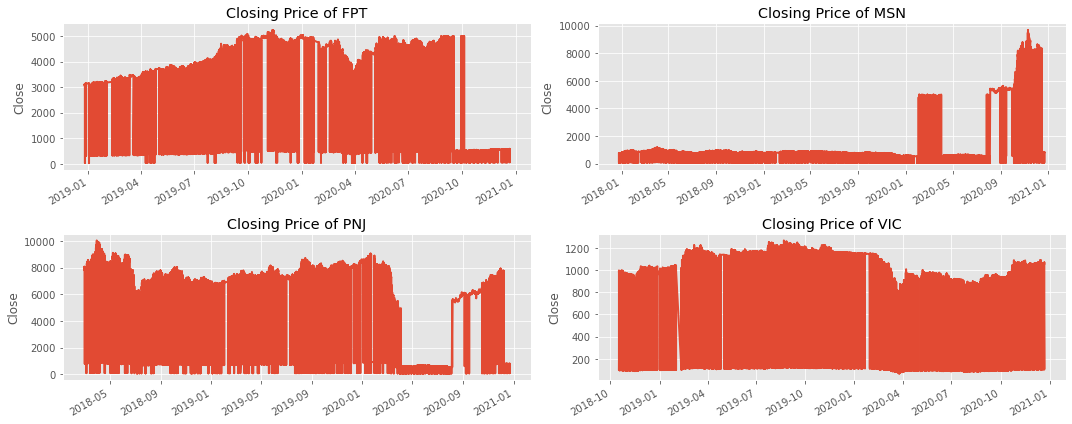

In [62]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(top =1.25, bottom=1.2)
for i, ticker in enumerate(Company, 1):
    plt.subplot(2, 2, i)
    ticker['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i-1]}")
plt.tight_layout()

### Biểu đồ so sánh về tống giá trị giao dịch trong từng ngày

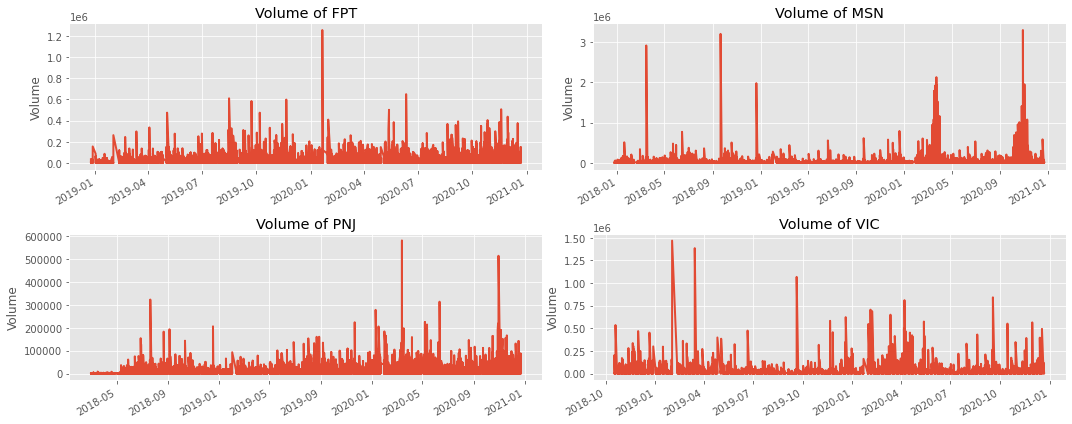

In [65]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, ticker in enumerate(Company, 1):
    plt.subplot(2,2,i)
    ticker['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume of {tech_list[i-1]}")
plt.tight_layout()

### Xử lý dữ liệu thuộc FPT

In [19]:
data = FPT.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset)*.80))
training_data_len

77925

### Giá đóng cửa của FPT

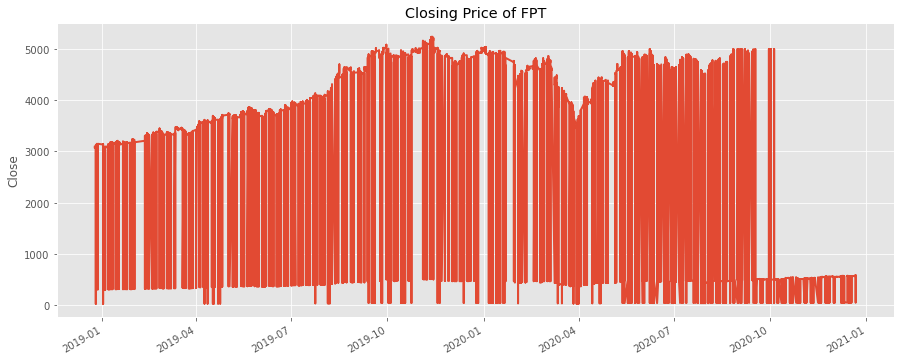

In [20]:
plt.figure(figsize =(15,6))
FPT['Close'].plot()
plt.ylabel('Close')
plt.xlabel(None)
plt.title('Closing Price of FPT')
plt.show()

#### Khai báo thư viện sklearn.preprocessing để sử dụng hàm MinMaxScaler để chia tỷ lệ tệp dữ liệu để đạt được hiệu quả cao

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.58785083],
       [0.58631296],
       [0.58496732],
       ...,
       [0.1059208 ],
       [0.10572857],
       [0.10572857]])

#### Tạo tệp huấn luyện train và chia tệp dữ liệu train theo tỷ lệ 

In [23]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.58785083, 0.58631296, 0.58496732, 0.58496732, 0.58496732,
       0.58496732, 0.58342945, 0.59207997, 0.59361784, 0.59361784,
       0.5928489 , 0.59207997, 0.59207997, 0.59207997, 0.59361784,
       0.59361784, 0.59207997, 0.59419454, 0.59419454, 0.59073433,
       0.59073433, 0.58919646, 0.58919646, 0.58919646, 0.58919646,
       0.58785083, 0.58785083, 0.58919646, 0.58785083, 0.58785083,
       0.58919646, 0.58919646, 0.59073433, 0.59361784, 0.59207997,
       0.5928489 , 0.5928489 , 0.59207997, 0.59207997, 0.59207997,
       0.59207997, 0.59361784, 0.59361784, 0.59361784, 0.59207997,
       0.59207997, 0.59207997, 0.59207997, 0.59207997, 0.5928489 ,
       0.5928489 , 0.59207997, 0.5928489 , 0.59207997, 0.5928489 ,
       0.59207997, 0.59207997, 0.59207997, 0.59207997, 0.59207997])]
[0.5928489042675894]

[array([0.58785083, 0.58631296, 0.58496732, 0.58496732, 0.58496732,
       0.58496732, 0.58342945, 0.59207997, 0.59361784, 0.59361784,
       0.5928489 , 0.59207997, 0.592

### Xây dựng mô hình LSTM
##### Để xây dựng mô hình LSTM ta cần khởi tạo thư viện keras
###### 1.keras.models: khởi tạo model
###### 2.keras.layers: khởi tạo mạng nơ-ron
###### 3.Chúng ta khởi tạo model bằng Sequential sau đó dùng method add để thêm các layer

In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64,  return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=5)

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle